In [308]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.formatter.useoffset'] = False

In [295]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            spine.set_visible(True)
            #spine.set_position(("outward",1))
            spine.set_smart_bounds(True)
            if ylim:
                ax.set_ylim(ylim)
            if yticks:
                ax.set_yticks(yticks) 
            if yticklabels:
                ax.set_yticklabels(yticklabels,fontsize=text_size)
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
            ax.yaxis.set_ticks_position('left')
            ax.yaxis.set_tick_params(direction='out')
        elif loc == 'bottom': # settings for x-axis
            spine.set_position('zero')
            spine.set_visible(False)
            spine.set_smart_bounds(False)
            if xlim:
                ax.set_xlim(xlim)
            if xlabel:
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
            if xticks:
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
            else:
                ax.tick_params(axis='x',which='both',length=0)
            if xticklabels:
                ax.set_xticklabels(xticklabels,fontsize=text_size)
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

In [3]:
#REGIONS OF INTEREST BASED ON dStruct
#Start	Stop	pval	FDR
#1113	1132	0.000604629516601562	0.381496031628333
#9889	9902	0.0008544921875	0.381496031628333
#10051	10061	0.0009765625	0.381496031628333
#16082	16098	0.00014495849609375	0.317024230957031
#17031	17047	0.00104662834465935	0.381496031628333
#17741	17751	0.0009765625	0.381496031628333

In [32]:
#Getting region 16082	16098 for DIFF BUM HMM OUTPUT 
df_diff_bumhmm_output = pd.read_csv('../../Xist_in vivo_vs_ex vivo_new_data_october_diff_BUM_HMM_analysed.txt', sep="\t", header=0)

In [33]:
df_diff_bumhmm_output.head()

,UU,UM,MU,MM
1,1.000000,5.310265e-14,5.125995e-10,2.722039e-23
2,0.994480,2.754820e-03,2.757526e-03,7.638654e-06
3,1.000000,7.423341e-30,1.852539e-23,1.375203e-52
4,0.981319,9.296475e-03,9.296468e-03,8.806961e-05
5,0.970306,1.473533e-02,1.473532e-02,2.237746e-04


In [35]:
df_diff_bumhmm_output = df_diff_bumhmm_output.loc[16082:16099][["UM","MU"]]

In [36]:
df_diff_bumhmm_output.head()

,UM,MU
16082,2.015341e-11,2.778370e-22
16083,1.809466e-30,7.090855e-35
16084,9.309652e-14,1.503866e-16
16085,9.144186e-40,6.062040e-28
16086,8.960614e-28,9.753335e-29


In [37]:
#Getting region 16082	16098 FOR dStruct analysis

df_pea_output = pd.read_csv('../../output_dStruct_Xist_new_data_reac_table.txt', sep="\t", header=0, index_col=0)

In [27]:
df_pea_output.head()

,A1,A2,B1,B2
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0


In [38]:
df_pea_output = df_pea_output.loc[16082:16099][["A2","B1"]]

### Merging the data:

In [134]:
new_df = df_diff_bumhmm_output.join(df_pea_output)

In [135]:
new_df.head()

,UM,MU,A2,B1
16082,2.015341e-11,2.778370e-22,0.000000,0.104781
16083,1.809466e-30,7.090855e-35,1.333134,0.866639
16084,9.309652e-14,1.503866e-16,0.524476,0.289116
16085,9.144186e-40,6.062040e-28,0.000000,0.072807
16086,8.960614e-28,9.753335e-29,0.000000,0.181925


In [136]:
#THRESHOLDING DIFF BUM HMM OUTPUT
#new_df['UM'] = [0 if x<0.05 else x for x in new_df['UM']]
#new_df['MU'] = [0 if x<0.05 else x for x in new_df['MU']]

In [137]:
new_df.head()

,UM,MU,A2,B1
16082,2.015341e-11,2.778370e-22,0.000000,0.104781
16083,1.809466e-30,7.090855e-35,1.333134,0.866639
16084,9.309652e-14,1.503866e-16,0.524476,0.289116
16085,9.144186e-40,6.062040e-28,0.000000,0.072807
16086,8.960614e-28,9.753335e-29,0.000000,0.181925


In [138]:
#print(new_df.columns)
new_df = new_df[['MU', 'UM','A2','B1']]
#print(new_df.columns)

new_df.columns = ['in cell - DIFF BUM HMM', 'ex vivo - DIFF BUM HMM','in cell - dStruct', 'ex vivo - dStruct'  ]
#print(new_df.columns)

In [139]:
new_df.head()

,in cell - DIFF BUM HMM,ex vivo - DIFF BUM HMM,in cell - dStruct,ex vivo - dStruct
16082,2.778370e-22,2.015341e-11,0.000000,0.104781
16083,7.090855e-35,1.809466e-30,1.333134,0.866639
16084,1.503866e-16,9.309652e-14,0.524476,0.289116
16085,6.062040e-28,9.144186e-40,0.000000,0.072807
16086,9.753335e-29,8.960614e-28,0.000000,0.181925


### Adding nucleotide sequence for each position:

In [140]:
with open('../../Reference sequences/Xist.seq', 'r') as infile:
    ref_sequence = infile.read().replace('\n', '')

subsequence = list(ref_sequence[16081:16099])

print(len(subsequence))
print(len(new_df.index))
new_df.insert(loc=4, column='nucleotide', value=subsequence)

18
18


In [141]:
#ref_sequence

In [142]:
new_df.head()

,in cell - DIFF BUM HMM,ex vivo - DIFF BUM HMM,in cell - dStruct,ex vivo - dStruct,nucleotide
16082,2.778370e-22,2.015341e-11,0.000000,0.104781,A
16083,7.090855e-35,1.809466e-30,1.333134,0.866639,A
16084,1.503866e-16,9.309652e-14,0.524476,0.289116,A
16085,6.062040e-28,9.144186e-40,0.000000,0.072807,A
16086,9.753335e-29,8.960614e-28,0.000000,0.181925,G


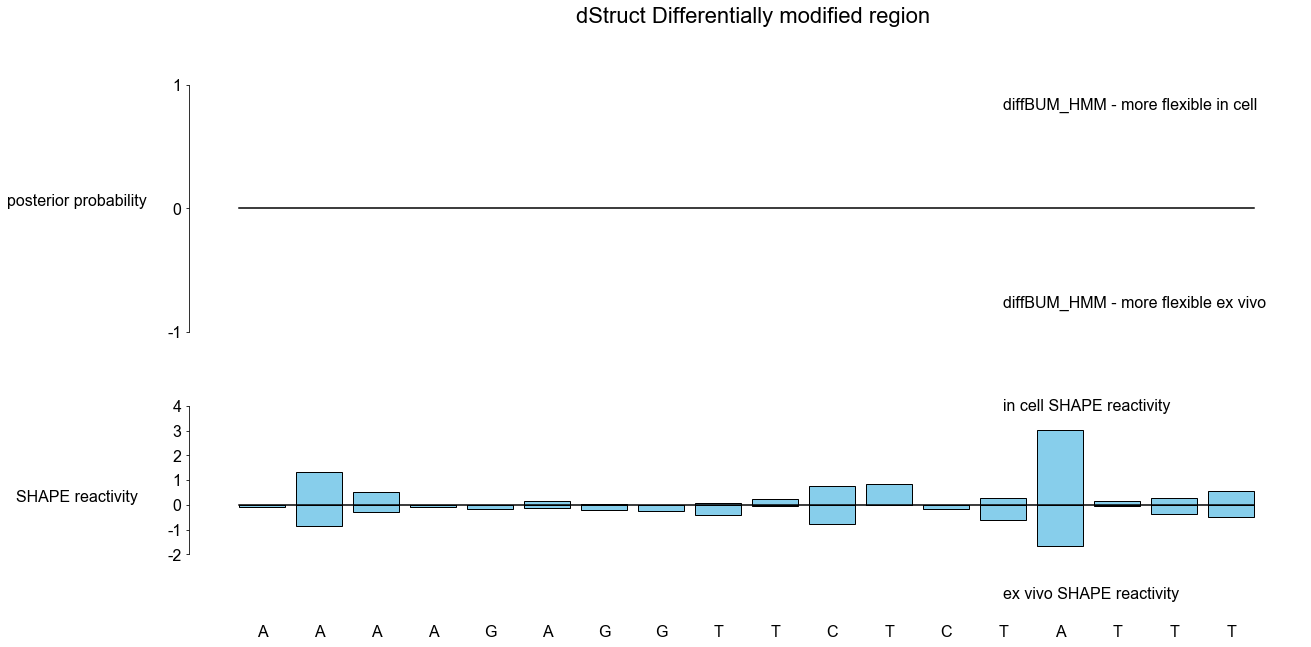

In [319]:
fig,ax = plt.subplots(2,sharex=True,figsize=[20,10])
nucleotides = list(new_df['nucleotide'].values)
positions = list(new_df.index)

y = list(new_df[new_df.columns[0]].values)
z = list(-new_df[new_df.columns[1]].values)
ax[0].bar(positions,y)
ax[0].bar(positions,z)
ax[0].text(max(positions)-4,0.8,"diffBUM_HMM - more flexible in cell",fontsize=16)
ax[0].text(max(positions)-4,-0.8,"diffBUM_HMM - more flexible ex vivo",fontsize=16)
ax[0].text(np.mean(positions)-3,1.5,'dStruct Differentially modified region',fontsize=22)
ax[0].axhline(y=0,xmin=0.045,xmax=0.955,color='black')
formatAxes(ax[0],\
           text_size=16,\
           yticks=list(np.arange(-1,2)),\
           yticklabels=list(np.arange(-1,2)),\
           ylabel='posterior probability')

y = list(new_df[new_df.columns[2]])
z = list(-new_df[new_df.columns[3]])
ax[1].bar(positions,y,color='skyblue',edgecolor='black')
ax[1].bar(positions,z,color='skyblue',edgecolor='black')
ax[1].text(max(positions)-4,3.8,"in cell SHAPE reactivity",fontsize=16)
ax[1].text(max(positions)-4,-3.8,"ex vivo SHAPE reactivity",fontsize=16)
ax[1].axhline(y=0,xmin=0.045,xmax=0.955,color='black')
formatAxes(ax[1],\
           text_size=16,\
           xticks=positions,\
           xticklabels=nucleotides,\
           yticks=list(np.arange(-5,6)),\
           yticklabels=list(np.arange(-5,6)),
           ylabel='SHAPE reactivity')

ax[1].tick_params(axis='x',which='major',pad=120)

fig.savefig("diff_BUM_HMM_vs_dStruct_plot_Xist_16082_16098_threshold_0_05.pdf",dpi=400)   